In [31]:
import os
import pydotplus
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
import matplotlib.pyplot as plt 
from sklearn import datasets, metrics, model_selection

In [32]:
df = pd.read_csv("D:\python school\HMDA.csv")
print(df.head(10))
# DENY=房貸申請結果, BLACK=是否為黑人, PI_RATIO=每月攤還佔所得比 , HOUSE_INCOME=家庭支出與收入比, MEDIUM=貸款價值比是否介在0.8~0.95
# HIGH=貸款價值比是否大於0.95, LOAN_VALUE=貸款價值比, CONSUMER_CREDIT=消費者信用分數, MORGAGE_CREDIT=房貸信用分數, PUBLIC=公共不良紀錄
# SELF=自雇者, SINGLE=單身, URIA=申請者工作所屬產業之失業率

     DENY  BLACK  PI_RATIO  HOUSE_INCOME  MEDIUM  HIGH  LOAN_VALUE  \
0  Accept      0     0.221         0.221       1     0    0.800000   
1  Accept      0     0.265         0.265       1     0    0.921875   
2  Accept      0     0.372         0.248       1     0    0.920398   
3  Accept      0     0.320         0.250       1     0    0.860465   
4  Accept      0     0.360         0.350       0     0    0.600000   
5  Accept      0     0.240         0.170       0     0    0.510526   
6  Accept      0     0.350         0.290       0     0    0.746667   
7  Accept      0     0.280         0.220       1     0    0.850000   
8  Reject      0     0.310         0.240       1     0    0.897260   
9  Accept      0     0.180         0.170       0     0    0.358744   

   CONSUMER_CREDIT  MORGAGE_CREDIT  PUBLIC  DENIED_MI  SELF  SINGLE  URIA  
0                5               2       0          0     0       0   3.9  
1                2               2       0          0     0       1   3.2  
2

In [82]:
Y = df["DENY"]
X = df.drop(["DENY"],axis=1)
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 666)
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=666)
print(clf.fit(x_train,y_train))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=666, splitter='best')


In [75]:
print(metrics.classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

      Accept       0.92      0.97      0.94       631
      Reject       0.62      0.35      0.45        83

    accuracy                           0.90       714
   macro avg       0.77      0.66      0.70       714
weighted avg       0.88      0.90      0.89       714



In [88]:
print(list(zip(df.columns, clf.feature_importances_)))

[('DENY', 0.0), ('BLACK', 0.23599352636790766), ('PI_RATIO', 0.0), ('HOUSE_INCOME', 0.0), ('MEDIUM', 0.0), ('HIGH', 0.09915220320834664), ('LOAN_VALUE', 0.1423530474972237), ('CONSUMER_CREDIT', 0.0), ('MORGAGE_CREDIT', 0.11522804343760518), ('PUBLIC', 0.3935149260810848), ('DENIED_MI', 0.0), ('SELF', 0.008755252168620328), ('SINGLE', 0.0050030012392116175)]


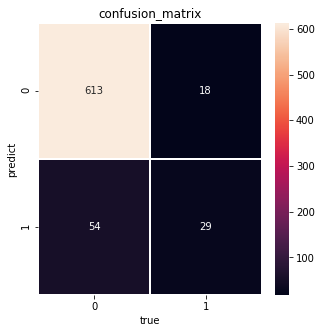

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_predict=clf.predict(x_test)
confusion_matrix = confusion_matrix(y_test,y_predict)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",label="true")
plt.title("confusion_matrix")
plt.xlabel("true")
plt.ylabel("predict")
plt.show()

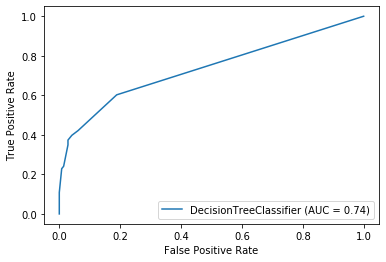

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)

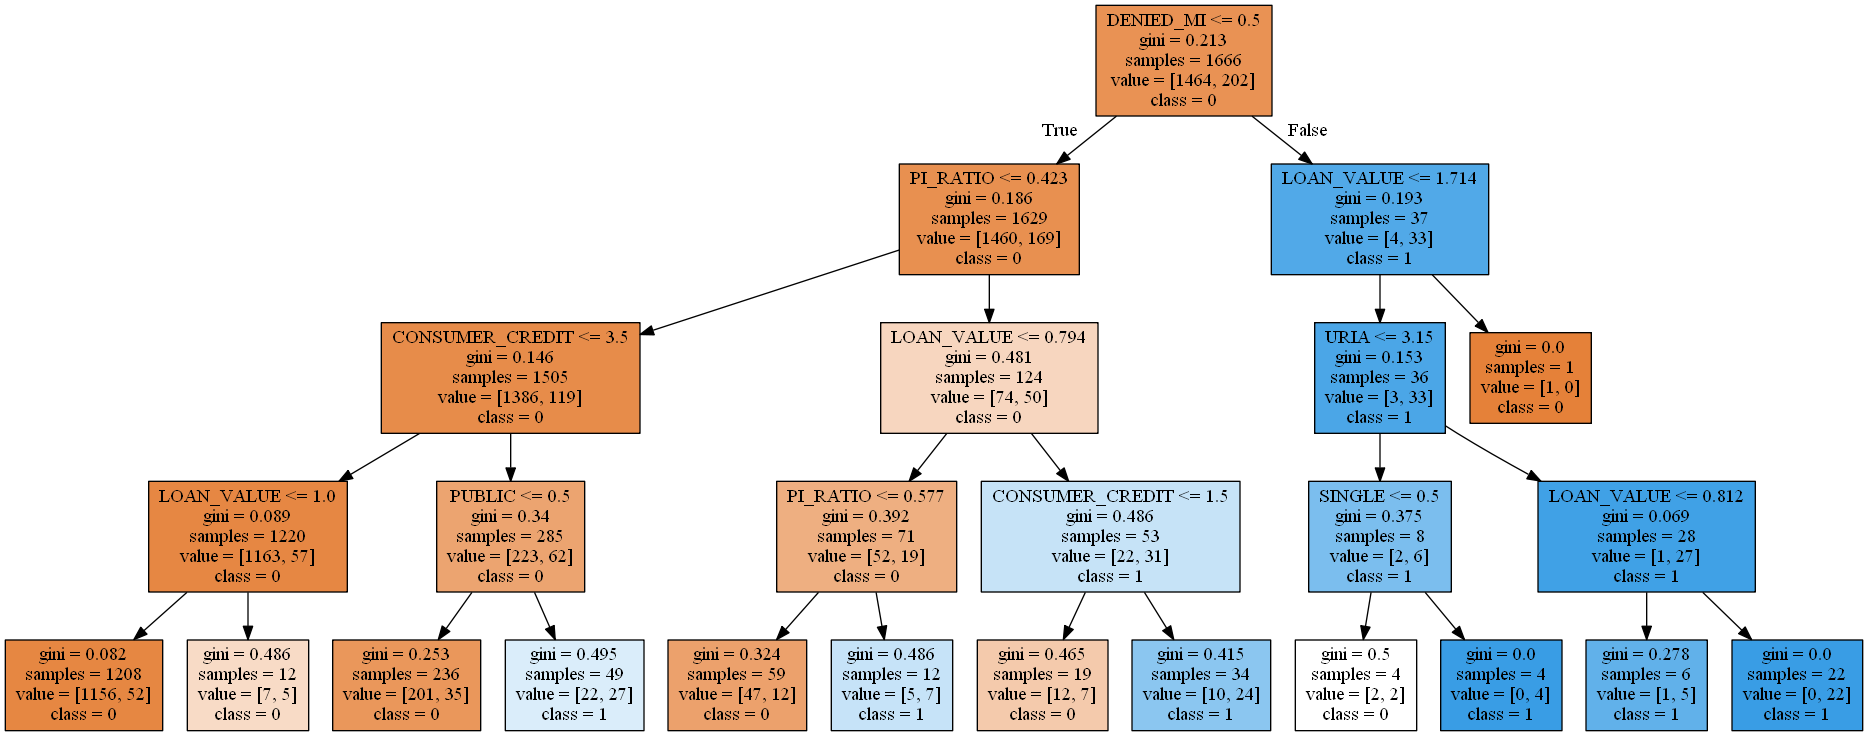

In [68]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, feature_names=df.drop(["DENY"],axis=1).columns, class_names=['0', '1'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())